In [1]:
%matplotlib inline

# Assuming we are in the notebooks directory, we need to move one up:
%cd ../..

/home/olivia/Code/neural_link_SV_iDE


In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set(font_scale=1.8)
sns.set_style('ticks')

df = pd.read_csv('./data/participants_and_model.csv')

# If you want to exclude people, comment this out:
# exclude = [13, 25, # did not do task 
#            56, # inversed buttons
#            30] # too much movement

# df = df.drop(df.index[df.ID.isin(exclude)])

In [3]:
# df = df[df['ID'] != 13]
df[df['ID'] == 25]['participant_response'].describe()


count                 512
unique                  4
top       strongly_accept
freq                  382
Name: participant_response, dtype: object

In [4]:
df[df['ID'] == 25]

,trial,onset,duration,gain,loss,RT,participant_response,ID,run,risk,...,intercept,p_accept,entropy,mc_loss,mc_gain,mc_entropy,gain_coef,loss_coef,intercept_coef,loglikelihood
5344,1,4.046,4,10,18,1.559,strongly_reject,25,1,10.295630,...,1,4.483200e-68,1.003011e-65,5.5,-15.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5345,2,13.728,4,16,13,1.661,weakly_accept,25,1,10.307764,...,1,1.000000e+00,0.000000e+00,0.5,-9.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5346,3,22.630,4,18,14,1.143,strongly_accept,25,1,11.401754,...,1,1.000000e+00,0.000000e+00,1.5,-7.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5347,4,30.431,4,34,8,1.247,strongly_accept,25,1,17.464249,...,1,1.000000e+00,0.000000e+00,-4.5,9.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5348,5,36.432,4,24,17,1.248,strongly_accept,25,1,14.705441,...,1,1.000000e+00,0.000000e+00,4.5,-1.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5349,6,42.633,4,10,15,2.287,weakly_reject,25,1,9.013878,...,1,6.228111e-43,8.732068e-41,2.5,-15.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5350,7,48.034,4,18,20,1.351,weakly_reject,25,1,13.453624,...,1,8.652160e-18,4.904187e-16,7.5,-7.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5351,8,54.135,4,12,10,1.560,weakly_accept,25,1,7.810250,...,1,1.000000e+00,0.000000e+00,-2.5,-13.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5352,9,59.639,4,20,15,1.663,weakly_accept,25,1,12.500000,...,1,1.000000e+00,0.000000e+00,2.5,-5.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191
5353,10,64.721,4,36,8,0.936,strongly_accept,25,1,18.439089,...,1,1.000000e+00,0.000000e+00,-4.5,11.0,-0.021523,19.297788,-19.297788,-0.693147,-3.8191


In [5]:
df.columns

Index(['trial', 'onset', 'duration', 'gain', 'loss', 'RT',
       'participant_response', 'ID', 'run', 'risk', 'use', 'accept', 'group',
       'gender', 'age', 'intercept', 'p_accept', 'entropy', 'mc_loss',
       'mc_gain', 'mc_entropy', 'gain_coef', 'loss_coef', 'intercept_coef',
       'loglikelihood'],
      dtype='object')

In [6]:
fig_df = df[['gain_coef', 'loss_coef', 'intercept_coef', 'loglikelihood', 'group', 'ID']]
fig_df.drop_duplicates()

,gain_coef,loss_coef,intercept_coef,loglikelihood,group,ID
0,1.600386,-1.499745,-1.928603,-12.528000,equalIndifference,1
255,0.622608,-0.406474,-2.988337,-78.065000,equalRange,2
511,0.410920,-0.285390,-1.893074,-47.245000,equalIndifference,3
757,1.116629,-1.069326,0.132057,-42.007000,equalRange,4
1009,0.167585,-0.452376,2.047226,-96.143000,equalIndifference,5
1265,1.635005,-1.878201,0.895862,-27.064000,equalRange,6
1521,0.605512,-0.823179,-2.248211,-42.169000,equalRange,8
1777,0.818974,-0.821355,-4.645667,-30.818000,equalIndifference,9
2032,3.282090,-3.281852,2.129039,-15.011000,equalRange,10
2284,0.771670,-0.753585,0.622219,-22.210000,equalIndifference,11


In [7]:
df[df['gain_coef'] < 0]

,trial,onset,duration,gain,loss,RT,participant_response,ID,run,risk,...,intercept,p_accept,entropy,mc_loss,mc_gain,mc_entropy,gain_coef,loss_coef,intercept_coef,loglikelihood
29470,1,4.063,4,12,16,2.162,strongly_reject,56,1,10.000000,...,1,9.996222e-01,4.840565e-03,3.5,-0.5,-0.145835,-1.849049,1.883213,-0.062054,-26.737
29471,2,9.529,4,9,14,1.648,strongly_accept,56,1,8.321658,...,1,9.999363e-01,9.795679e-04,1.5,-3.5,-0.149696,-1.849049,1.883213,-0.062054,-26.737
29472,3,17.131,4,5,5,1.753,weakly_accept,56,1,3.535534,...,1,5.271648e-01,9.978697e-01,-7.5,-7.5,0.847195,-1.849049,1.883213,-0.062054,-26.737
29473,4,23.632,4,5,14,1.028,strongly_accept,56,1,7.433034,...,1,1.000000e+00,1.018069e-06,1.5,-7.5,-0.150674,-1.849049,1.883213,-0.062054,-26.737
29474,5,29.133,4,19,9,1.442,strongly_reject,56,1,10.511898,...,1,1.191973e-08,3.309485e-07,-3.5,6.5,-0.150675,-1.849049,1.883213,-0.062054,-26.737
29475,6,35.334,4,14,12,1.340,weakly_reject,56,1,9.219544,...,1,3.388914e-02,2.135355e-01,-0.5,1.5,0.062860,-1.849049,1.883213,-0.062054,-26.737
29476,7,40.935,4,18,7,1.131,strongly_reject,56,1,9.656604,...,1,1.752104e-09,5.349342e-08,-5.5,5.5,-0.150675,-1.849049,1.883213,-0.062054,-26.737
29477,8,46.936,4,13,5,1.132,strongly_reject,56,1,6.964194,...,1,4.197406e-07,9.497342e-06,-7.5,0.5,-0.150666,-1.849049,1.883213,-0.062054,-26.737
29478,9,54.928,4,6,20,1.133,strongly_accept,56,1,10.440307,...,1,1.000000e+00,1.220103e-10,7.5,-6.5,-0.150675,-1.849049,1.883213,-0.062054,-26.737
29479,10,61.128,4,16,14,1.957,weakly_reject,56,1,10.630146,...,1,3.619891e-02,2.245842e-01,1.5,3.5,0.073909,-1.849049,1.883213,-0.062054,-26.737


In [8]:
df[df['ID'] == 56]

,trial,onset,duration,gain,loss,RT,participant_response,ID,run,risk,...,intercept,p_accept,entropy,mc_loss,mc_gain,mc_entropy,gain_coef,loss_coef,intercept_coef,loglikelihood
29470,1,4.063,4,12,16,2.162,strongly_reject,56,1,10.000000,...,1,9.996222e-01,4.840565e-03,3.5,-0.5,-0.145835,-1.849049,1.883213,-0.062054,-26.737
29471,2,9.529,4,9,14,1.648,strongly_accept,56,1,8.321658,...,1,9.999363e-01,9.795679e-04,1.5,-3.5,-0.149696,-1.849049,1.883213,-0.062054,-26.737
29472,3,17.131,4,5,5,1.753,weakly_accept,56,1,3.535534,...,1,5.271648e-01,9.978697e-01,-7.5,-7.5,0.847195,-1.849049,1.883213,-0.062054,-26.737
29473,4,23.632,4,5,14,1.028,strongly_accept,56,1,7.433034,...,1,1.000000e+00,1.018069e-06,1.5,-7.5,-0.150674,-1.849049,1.883213,-0.062054,-26.737
29474,5,29.133,4,19,9,1.442,strongly_reject,56,1,10.511898,...,1,1.191973e-08,3.309485e-07,-3.5,6.5,-0.150675,-1.849049,1.883213,-0.062054,-26.737
29475,6,35.334,4,14,12,1.340,weakly_reject,56,1,9.219544,...,1,3.388914e-02,2.135355e-01,-0.5,1.5,0.062860,-1.849049,1.883213,-0.062054,-26.737
29476,7,40.935,4,18,7,1.131,strongly_reject,56,1,9.656604,...,1,1.752104e-09,5.349342e-08,-5.5,5.5,-0.150675,-1.849049,1.883213,-0.062054,-26.737
29477,8,46.936,4,13,5,1.132,strongly_reject,56,1,6.964194,...,1,4.197406e-07,9.497342e-06,-7.5,0.5,-0.150666,-1.849049,1.883213,-0.062054,-26.737
29478,9,54.928,4,6,20,1.133,strongly_accept,56,1,10.440307,...,1,1.000000e+00,1.220103e-10,7.5,-6.5,-0.150675,-1.849049,1.883213,-0.062054,-26.737
29479,10,61.128,4,16,14,1.957,weakly_reject,56,1,10.630146,...,1,3.619891e-02,2.245842e-01,1.5,3.5,0.073909,-1.849049,1.883213,-0.062054,-26.737


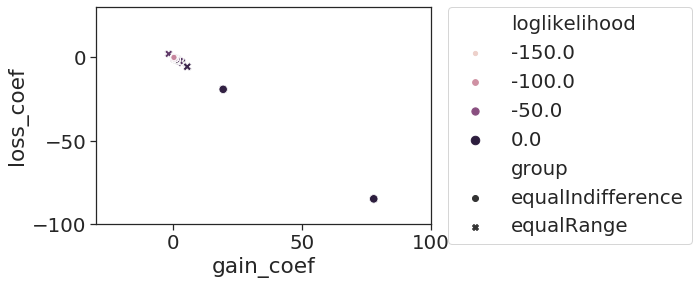

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=1)
ax = sns.scatterplot(x="gain_coef", y="loss_coef", data=fig_df,
                     hue="loglikelihood", style="group", size='loglikelihood')

ax.set_xlim([-30,100])
ax.set_ylim([-100, 30])

# Put the legend out of the figure
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

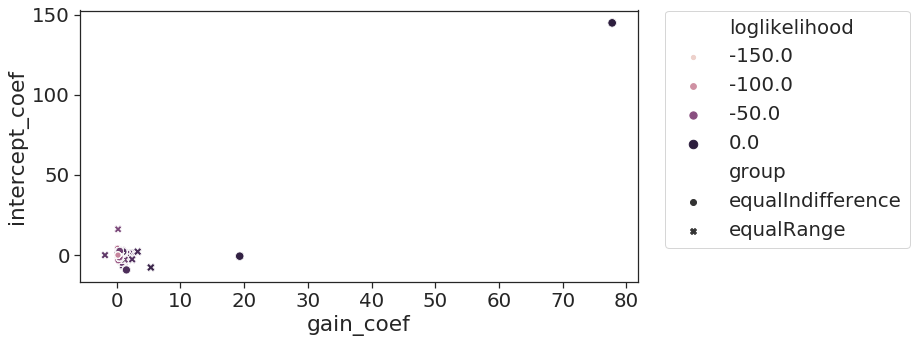

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = sns.scatterplot(x="gain_coef", y="intercept_coef", data=fig_df,
                     hue="loglikelihood", style="group", size='loglikelihood')
# ax.set_xlim([-0.5,3])
# ax.set_ylim([-12,10])# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

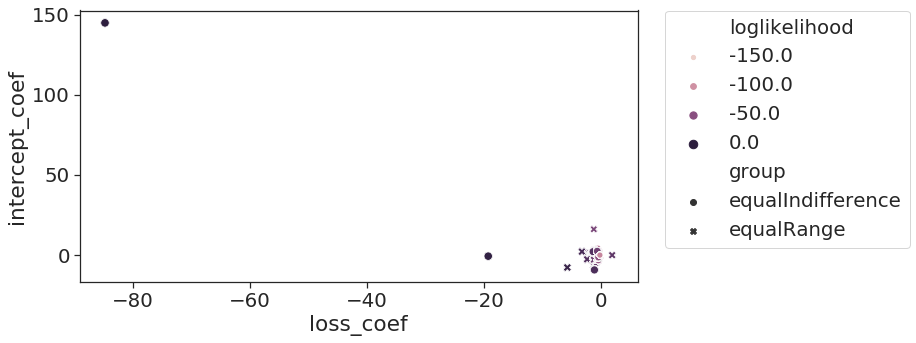

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = sns.scatterplot(x="loss_coef", y="intercept_coef", data=fig_df,
                     hue="loglikelihood", style="group", size='loglikelihood')
# ax.set_xlim([-0.5,3])
# ax.set_ylim([-12,10])# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

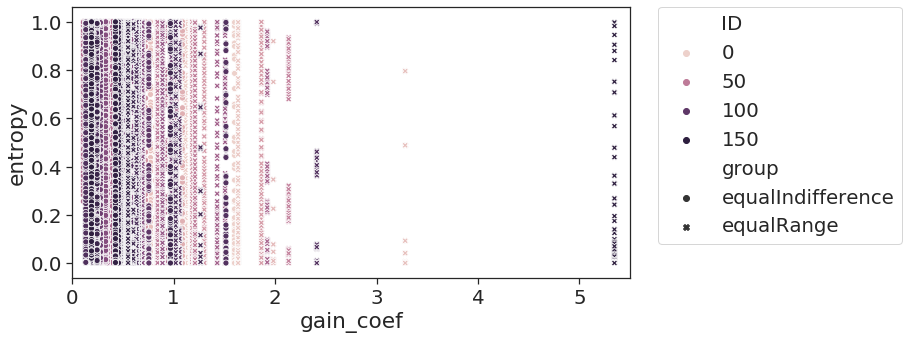

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = sns.scatterplot(x="gain_coef", y="entropy", data=df,
                     hue="ID", style="group")#, size='loglikelihood')
ax.set_xlim([0,5.5])
# ax.set_ylim([-3,0.1])# Put the legend out of the figure
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

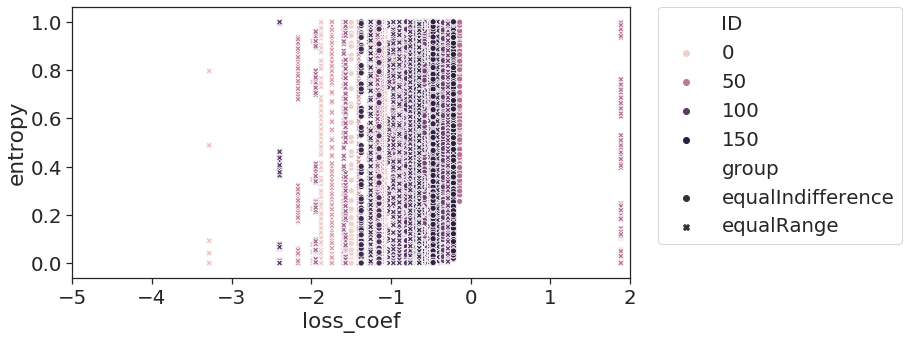

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax = sns.scatterplot(x="loss_coef", y="entropy", data=df,
                     hue="ID", style="group")#, size='loglikelihood')
ax.set_xlim([-5,2])

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

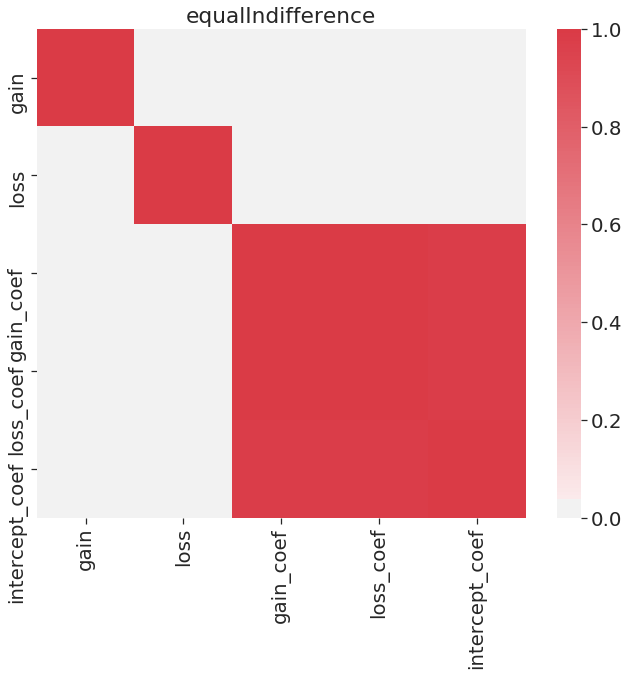

In [14]:
title = 'equalIndifference'

corr = df[df['group'] == title][['gain', 'loss', 'gain_coef', 'loss_coef', 'intercept_coef']].corr()
corr = np.fabs(corr)
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,square=True, vmin=0, vmax=corr.max().max())
plt.title(title)
plt.show()

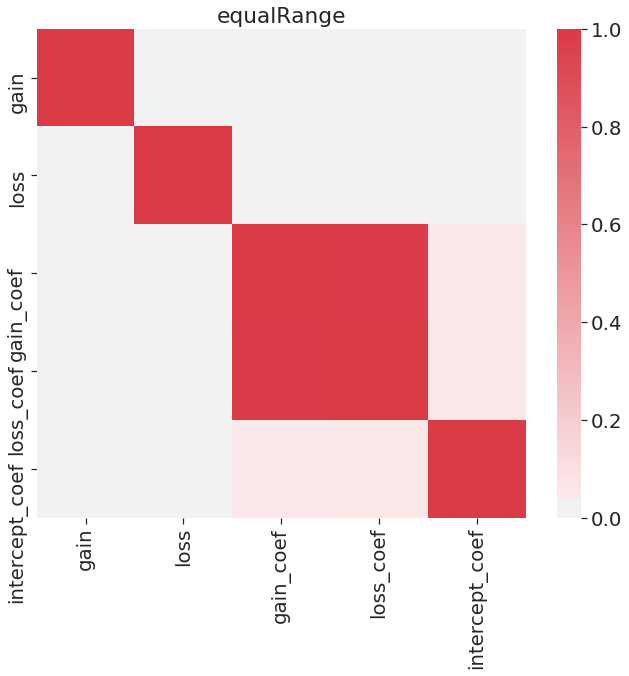

In [15]:
title = 'equalRange'

corr = df[df['group'] == title][['gain', 'loss', 'gain_coef', 'loss_coef', 'intercept_coef']].corr()
corr = np.fabs(corr)
# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,square=True, vmin=0, vmax=corr.max().max())
plt.title(title)
plt.show()

In [16]:
variables = ['gain_coef', 'loss_coef']

for variable in variables:
    mean = fig_df[variable].mean()
    std = fig_df[variable].std()
    print(mean, std)

    for index, row in fig_df.iterrows():
        if (row[variable] >= mean + std * 2.3):
            print(row[variable], row['ID'])

2.7672946019469804 11.634751566136528
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281

77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.75956184613281 13
77.7595618461

-3.0059422333128336 12.654268807306392


In [17]:
variables = ['gain_coef', 'loss_coef']
signs = [-1, 1]

for variable, sign in zip(variables, signs):
    for index, row in fig_df.iterrows():
        if (np.sign(row[variable]) == sign):
            print(row[variable], row['ID'])

-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.8490493471422935 56
-1.84904934

In [18]:
pick_df = fig_df.groupby('ID').mean()

In [19]:
# pick_df.to_csv('pick.csv')

In [20]:
p_87 = df[df['ID'] == 87]

In [21]:
p_87['subjective_value'] = p_87['gain'] * p_87['gain_coef'] + p_87['loss'] * p_87['loss_coef']

/home/olivia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
# p_87[['subjective_value', 'p_accept', 'entropy', 'gain', 'loss']].to_csv('87.csv')

In [23]:
p_87[['subjective_value', 'p_accept', 'entropy']].describe()

,subjective_value,p_accept,entropy
count,255.000000,255.000000,255.000000
mean,-0.134064,0.400000,0.423018
std,3.605760,0.385623,0.350138
min,-8.397868,0.000089,0.001325
25%,-2.851201,0.022298,0.091999
50%,-0.128884,0.257619,0.330496
75%,2.582693,0.839321,0.795664
max,8.129360,0.999254,1.000000


In [24]:
p_87[p_87['subjective_value'] < -2][['subjective_value', 'p_accept', 'entropy', 'gain', 'loss']]

,subjective_value,p_accept,entropy,gain,loss
36588,-7.285312,0.000271,0.003597,10,18
36591,-3.488031,0.011920,0.093270,28,20
36592,-4.568366,0.004079,0.038249,22,19
36595,-2.910273,0.021046,0.147274,24,17
36599,-2.835090,0.022652,0.156083,10,10
36602,-2.396956,0.034675,0.217319,32,20
36607,-5.092422,0.002419,0.024511,16,17
36609,-2.888792,0.021493,0.149744,20,15
36617,-7.296053,0.000268,0.003562,12,19
36627,-5.616479,0.001434,0.015611,10,15
